In [ ]:
!pip install shap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb



%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Advanced ML/adverts.csv')
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:
df.shape

(402005, 12)

In [ ]:
# creating a small set from the csv file it is going to chose a random 20000 rows
# from the file which contains 400k rows.

small_set = df.sample(n=20000)
small_set.shape

(20000, 12)

In [ ]:
small_set.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
373607,202010155051787,35759.0,67,White,Land Rover,Range Rover Evoque,USED,2017.0,27750,Coupe,False,Diesel
183915,202009023200304,8742.0,67,Grey,Vauxhall,Corsa,USED,2017.0,7892,Hatchback,False,Petrol
382080,202009304411871,49000.0,16,Grey,Vauxhall,Insignia,USED,2016.0,7699,Estate,False,Diesel
139493,202008062150601,10.0,NaN,Grey,Peugeot,3008,NEW,NaN,39992,SUV,False,Petrol Plug-in Hybrid
265608,202010144992159,8314.0,67,Black,Mercedes-Benz,GLC Class,USED,2017.0,28500,SUV,False,Diesel


In [ ]:
small_set.describe(include='all')

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
count,2.000000e+04,19992.000000,18424,19715,20000,20000,20000,18357.000000,2.000000e+04,19951,20000,19969
unique,NaN,NaN,57,19,68,691,2,NaN,NaN,14,2,8
top,NaN,NaN,17,Black,BMW,Golf,USED,NaN,NaN,Hatchback,False,Petrol
freq,NaN,NaN,1800,4292,1842,581,18453,NaN,NaN,8422,19907,10753
mean,2.020070e+14,37703.762905,NaN,NaN,NaN,NaN,NaN,2014.980988,1.725599e+04,NaN,NaN,NaN
std,1.779018e+10,34558.954335,NaN,NaN,NaN,NaN,NaN,8.689062,2.491483e+04,NaN,NaN,NaN
min,2.014031e+14,0.000000,NaN,NaN,NaN,NaN,NaN,999.000000,1.500000e+02,NaN,NaN,NaN
25%,2.020090e+14,10359.750000,NaN,NaN,NaN,NaN,NaN,2013.000000,7.490000e+03,NaN,NaN,NaN
50%,2.020093e+14,28791.500000,NaN,NaN,NaN,NaN,NaN,2016.000000,1.269000e+04,NaN,NaN,NaN
75%,2.020102e+14,56920.500000,NaN,NaN,NaN,NaN,NaN,2018.000000,1.999900e+04,NaN,NaN,NaN


In [ ]:
small_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 373607 to 266907
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       20000 non-null  int64  
 1   mileage                19992 non-null  float64
 2   reg_code               18424 non-null  object 
 3   standard_colour        19715 non-null  object 
 4   standard_make          20000 non-null  object 
 5   standard_model         20000 non-null  object 
 6   vehicle_condition      20000 non-null  object 
 7   year_of_registration   18357 non-null  float64
 8   price                  20000 non-null  int64  
 9   body_type              19951 non-null  object 
 10  crossover_car_and_van  20000 non-null  bool   
 11  fuel_type              19969 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 1.9+ MB


In [ ]:
small_set.isna().sum()

public_reference            0
mileage                     8
reg_code                 1576
standard_colour           285
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration     1643
price                       0
body_type                  49
crossover_car_and_van       0
fuel_type                  31
dtype: int64

In [ ]:
# removed all NA values
cleaned_df = small_set.dropna(axis=0)

In [ ]:
cleaned_df.isna().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [ ]:
for col in cleaned_df.columns:
  print(col)

public_reference
mileage
reg_code
standard_colour
standard_make
standard_model
vehicle_condition
year_of_registration
price
body_type
crossover_car_and_van
fuel_type


In [ ]:
cleaned_df['reg_code'].unique()

array(['67', '16', '63', '17', '10', '59', '62', '20', '69', '64', '66',
       '14', '19', '12', '18', '68', '61', '58', '15', '70', '09', '13',
       '65', '51', '06', '52', '05', '07', 'N', '11', '60', '55', '03',
       '56', '04', '08', '02', '54', 'Y', '57', 'G', '53', 'R', 'W', 'F',
       'H', 'S', 'T', 'X', 'B', 'L', 'V', 'M', 'K', 'P', 'E', 'J'],
      dtype=object)

In [ ]:
# Filter the rows where 'reg_code' is numeric
cleaned_df = cleaned_df[cleaned_df['reg_code'].str.isnumeric()]

# Verify the result
print(cleaned_df['reg_code'].unique())

['67' '16' '63' '17' '10' '59' '62' '20' '69' '64' '66' '14' '19' '12'
 '18' '68' '61' '58' '15' '70' '09' '13' '65' '51' '06' '52' '05' '07'
 '11' '60' '55' '03' '56' '04' '08' '02' '54' '57' '53']


In [ ]:
# dropped the first column 'public_reference' because it has no impact on the
# final results

s_df = cleaned_df.drop('public_reference', axis=1)

In [ ]:
# To check if there are any outliers
# Here we conclude that we don't have any outliers as the values are gradually increasing!
s_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,mileage,year_of_registration,price
count,17935.000000,17935.000000,17935.000000
mean,40520.882687,2015.172623,15654.808531
std,33589.139969,8.493004,19601.161049
min,0.000000,999.000000,250.000000
25%,14333.500000,2013.000000,6998.000000
50%,31742.000000,2016.000000,11988.000000
75%,59000.000000,2018.000000,18497.500000
90%,90000.000000,2019.000000,27999.600000
95%,106000.000000,2020.000000,37995.000000
99%,141000.000000,2020.000000,82424.520000


In [ ]:
s_df.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
373607,35759.0,67,White,Land Rover,Range Rover Evoque,USED,2017.0,27750,Coupe,False,Diesel
183915,8742.0,67,Grey,Vauxhall,Corsa,USED,2017.0,7892,Hatchback,False,Petrol
382080,49000.0,16,Grey,Vauxhall,Insignia,USED,2016.0,7699,Estate,False,Diesel
265608,8314.0,67,Black,Mercedes-Benz,GLC Class,USED,2017.0,28500,SUV,False,Diesel
144805,46000.0,63,White,Kia,ProCeed,USED,2013.0,8495,Hatchback,False,Petrol


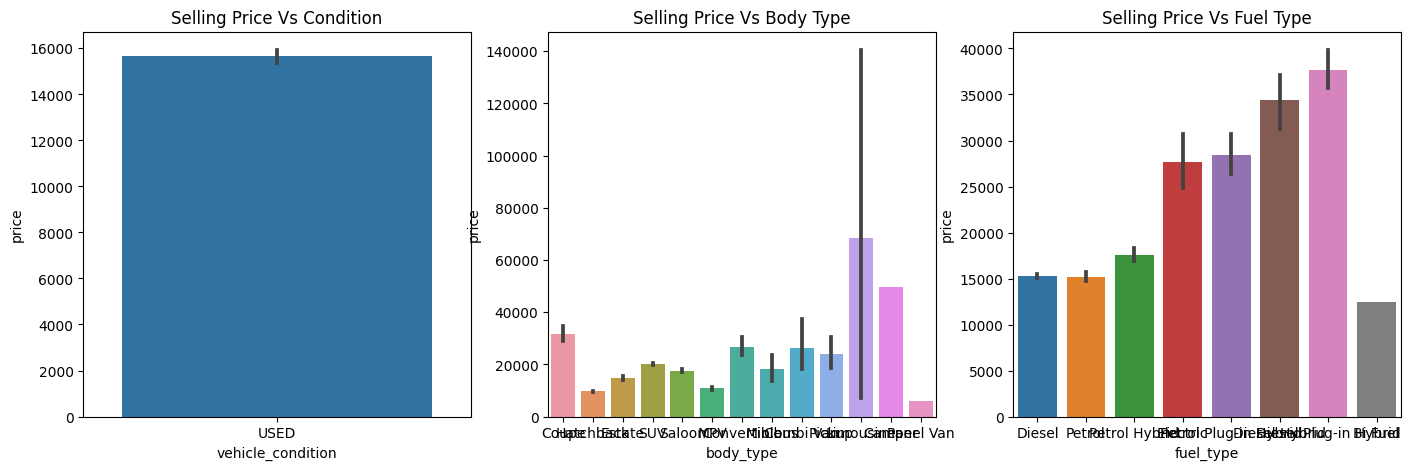

In [ ]:
plt.figure(figsize=[17,5])

# Plotting Selling Price Vs Condition
plt.subplot(1,3,1)
sns.barplot(x=s_df['vehicle_condition'], y=s_df['price'])
plt.title('Selling Price Vs Condition')

# Plotting Selling Price Vs Body Type
plt.subplot(1,3,2)
sns.barplot(x=s_df['body_type'], y=s_df['price'])
plt.title('Selling Price Vs Body Type')

# Plotting Selling Price Vs Fuel Type
plt.subplot(1,3,3)
sns.barplot(x=s_df['fuel_type'], y=s_df['price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

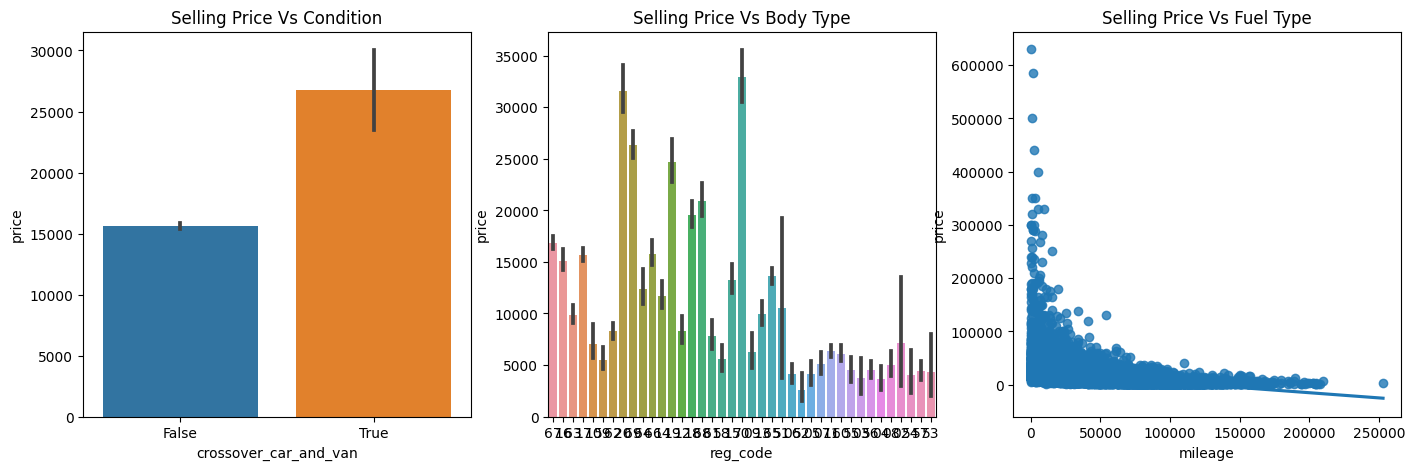

In [ ]:
plt.figure(figsize=[17,5])

# Plotting Selling Price Vs Condition
plt.subplot(1,3,1)
sns.barplot(x=s_df['crossover_car_and_van'], y=s_df['price'])
plt.title('Selling Price Vs Condition')

# Plotting Selling Price Vs Body Type
plt.subplot(1,3,2)
sns.barplot(x=s_df['reg_code'], y=s_df['price'])
plt.title('Selling Price Vs Body Type')

# Plotting Selling Price Vs Fuel Type
plt.subplot(1,3,3)
sns.regplot(x=s_df['mileage'], y=s_df['price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

so what im doing here is checking for outliers, first i will be looking at outliers inside price then i will be looking at outliers inside mileage because above the last graph is comapring price to mileage and there are some outliers that stick out for the visual which may cause issues when building a model

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = s_df[(s_df['price'] >= lower_bound) & (s_df['price'] <= upper_bound)]

print(filtered_df)

s_df = filtered_df

         mileage reg_code standard_colour  standard_make      standard_model  \
373607   35759.0       67           White     Land Rover  Range Rover Evoque   
183915    8742.0       67            Grey       Vauxhall               Corsa   
382080   49000.0       16            Grey       Vauxhall            Insignia   
265608    8314.0       67           Black  Mercedes-Benz           GLC Class   
144805   46000.0       63           White            Kia             ProCeed   
...          ...      ...             ...            ...                 ...   
29682     4450.0       19          Silver  Mercedes-Benz             C Class   
130256  109000.0       61          Silver       Vauxhall               Astra   
400752   25116.0       17           White         Toyota               Auris   
372267   27494.0       18           White        Renault                Clio   
266907   27287.0       67          Silver          Honda                CR-V   

       vehicle_condition  year_of_regis

In [ ]:
Q1 = df['mileage'].quantile(0.25)
Q3 = df['mileage'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mileage_df = s_df[(s_df['mileage'] >= lower_bound) & (s_df['mileage'] <= upper_bound)]

print(mileage_df)

s_df = mileage_df

         mileage reg_code standard_colour  standard_make      standard_model  \
373607   35759.0       67           White     Land Rover  Range Rover Evoque   
183915    8742.0       67            Grey       Vauxhall               Corsa   
382080   49000.0       16            Grey       Vauxhall            Insignia   
265608    8314.0       67           Black  Mercedes-Benz           GLC Class   
144805   46000.0       63           White            Kia             ProCeed   
...          ...      ...             ...            ...                 ...   
29682     4450.0       19          Silver  Mercedes-Benz             C Class   
130256  109000.0       61          Silver       Vauxhall               Astra   
400752   25116.0       17           White         Toyota               Auris   
372267   27494.0       18           White        Renault                Clio   
266907   27287.0       67          Silver          Honda                CR-V   

       vehicle_condition  year_of_regis

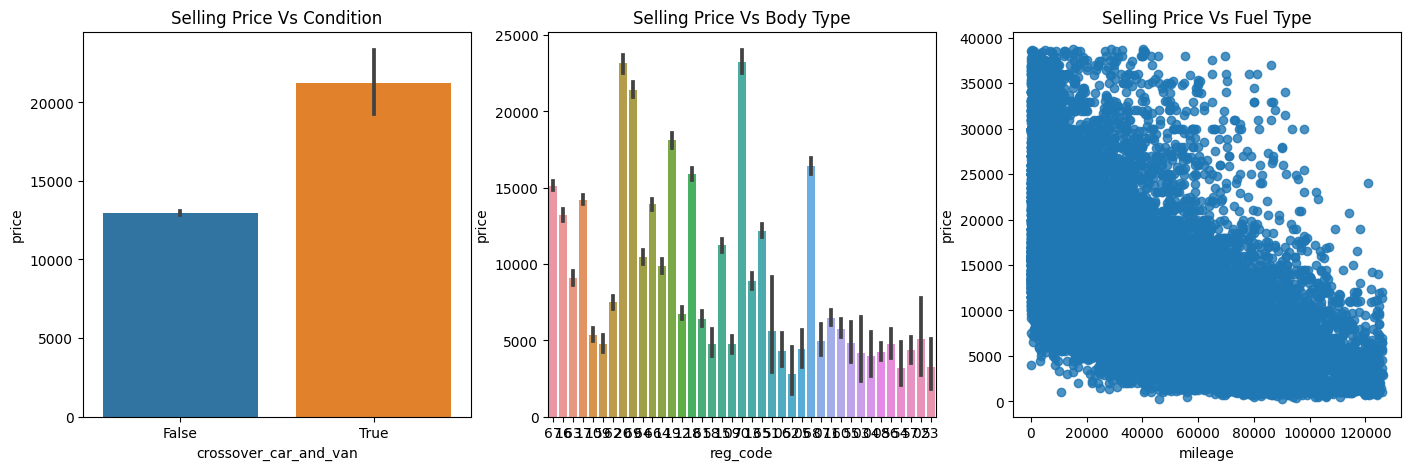

In [ ]:
plt.figure(figsize=[17,5])

# Plotting Selling Price Vs Condition
plt.subplot(1,3,1)
sns.barplot(x=s_df['crossover_car_and_van'], y=s_df['price'])
plt.title('Selling Price Vs Condition')

# Plotting Selling Price Vs Body Type
plt.subplot(1,3,2)
sns.barplot(x=s_df['reg_code'], y=s_df['price'])
plt.title('Selling Price Vs Body Type')

# Plotting Selling Price Vs Fuel Type
plt.subplot(1,3,3)
sns.regplot(x=s_df['mileage'], y=s_df['price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

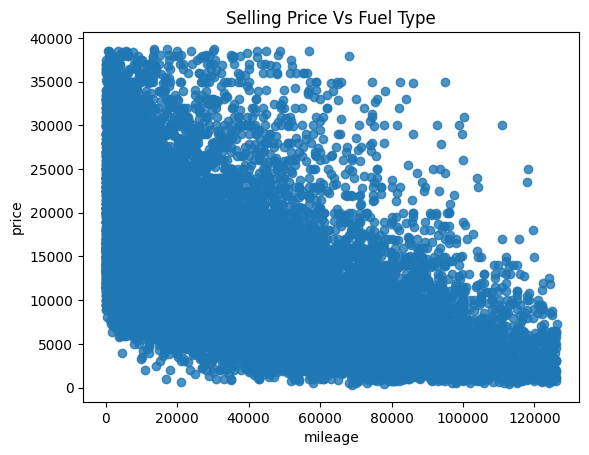

In [ ]:
plt.subplot(1,1,1)
sns.regplot(x=s_df['mileage'], y=s_df['price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

In [ ]:
s_df.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
373607,35759.0,67,White,Land Rover,Range Rover Evoque,USED,2017.0,27750,Coupe,False,Diesel
183915,8742.0,67,Grey,Vauxhall,Corsa,USED,2017.0,7892,Hatchback,False,Petrol
382080,49000.0,16,Grey,Vauxhall,Insignia,USED,2016.0,7699,Estate,False,Diesel
265608,8314.0,67,Black,Mercedes-Benz,GLC Class,USED,2017.0,28500,SUV,False,Diesel
144805,46000.0,63,White,Kia,ProCeed,USED,2013.0,8495,Hatchback,False,Petrol


<ipython-input-23-f351c63eded8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(s_df['price']))
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


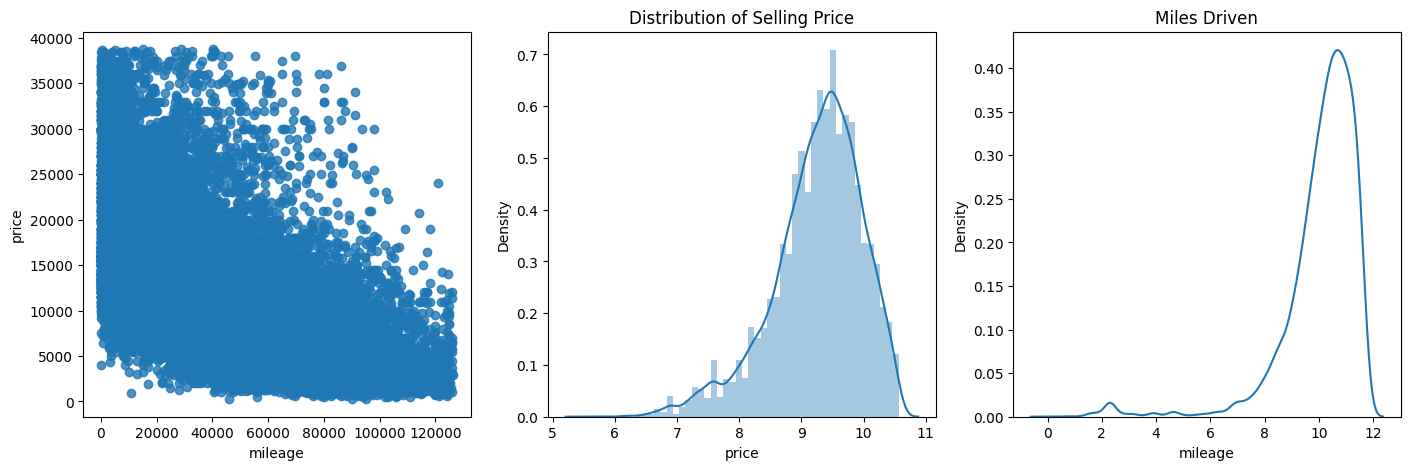

In [ ]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.regplot(x=s_df['mileage'], y=s_df['price'])

plt.subplot(1,3,2)
sns.distplot(np.log(s_df['price']))
plt.title('Distribution of Selling Price')


plt.subplot(1,3,3)
sns.kdeplot(np.log(s_df['mileage']))
plt.title('Distribution of Miles Drived')


plt.title('Miles Driven')
plt.show()

In [ ]:
# select numerical columns
df_numeric = s_df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
# select non-numeric columns
df_non_numeric = s_df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

In [ ]:
df_numeric.head()

,mileage,year_of_registration,price
373607,35759.0,2017.0,27750
183915,8742.0,2017.0,7892
382080,49000.0,2016.0,7699
265608,8314.0,2017.0,28500
144805,46000.0,2013.0,8495


In [ ]:
df_non_numeric.head()

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type
373607,67,White,Land Rover,Range Rover Evoque,USED,Coupe,False,Diesel
183915,67,Grey,Vauxhall,Corsa,USED,Hatchback,False,Petrol
382080,16,Grey,Vauxhall,Insignia,USED,Estate,False,Diesel
265608,67,Black,Mercedes-Benz,GLC Class,USED,SUV,False,Diesel
144805,63,White,Kia,ProCeed,USED,Hatchback,False,Petrol


In [ ]:
df_numeric.describe()

,mileage,year_of_registration,price
count,16720.000000,16720.000000,16720.000000
mean,39640.359988,2015.181160,12983.041687
std,30209.069354,8.687503,7896.041339
min,0.000000,999.000000,250.000000
25%,15222.500000,2013.000000,6999.000000
50%,32460.000000,2016.000000,11500.000000
75%,58800.000000,2018.000000,17399.000000
max,126300.000000,2020.000000,38750.000000


In [ ]:
df_non_numeric.describe()

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,crossover_car_and_van,fuel_type
count,16720,16720,16720,16720,16720,16720,16720,16720
unique,39,19,52,549,1,12,2,8
top,17,Black,Vauxhall,Golf,USED,Hatchback,False,Petrol
freq,1726,3626,1612,523,16720,7616,16668,8948


In [ ]:
# % of values missing in each column
values_list = list()
cols_list = list()
for col in s_df.columns:
    pct_missing = np.mean(s_df[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list

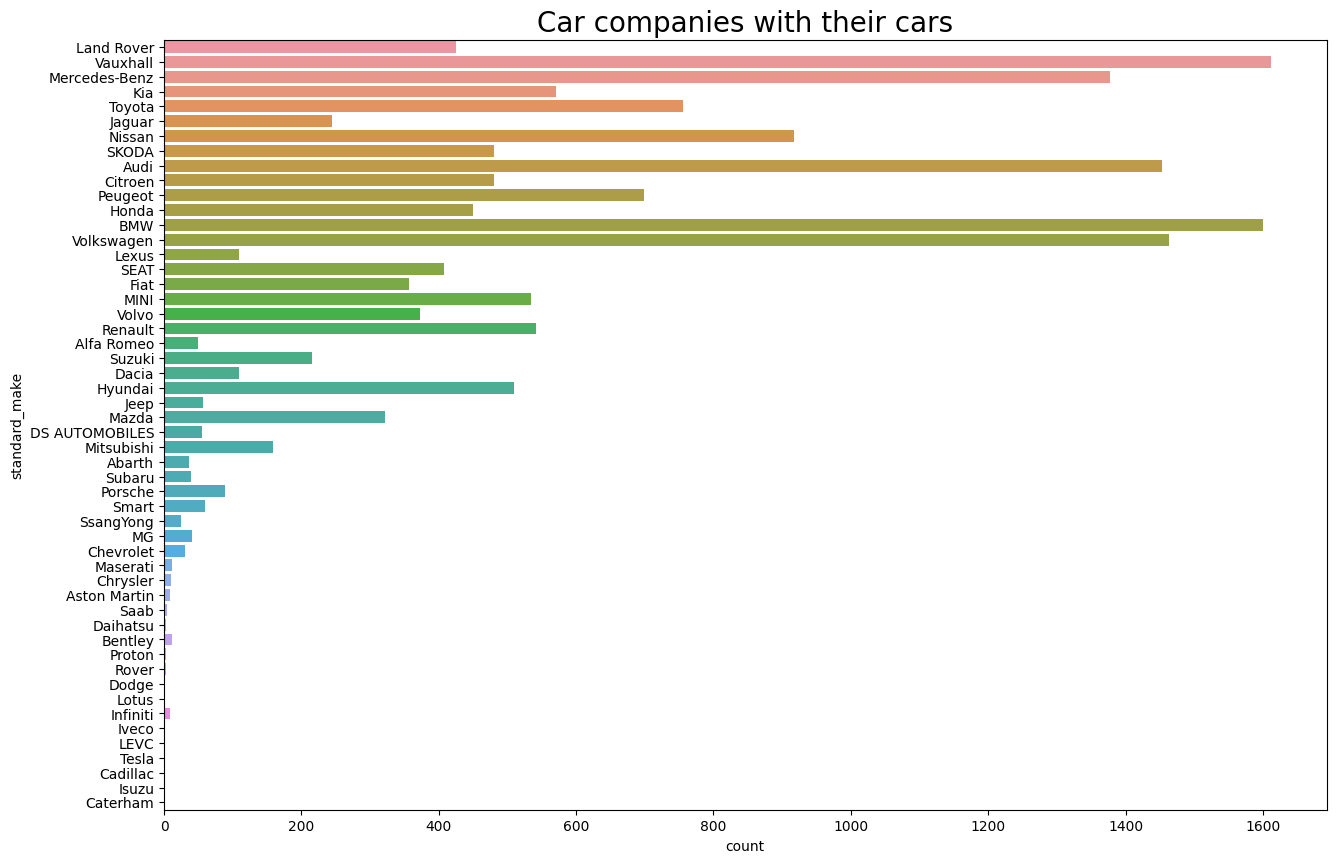

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y = s_df.standard_make)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

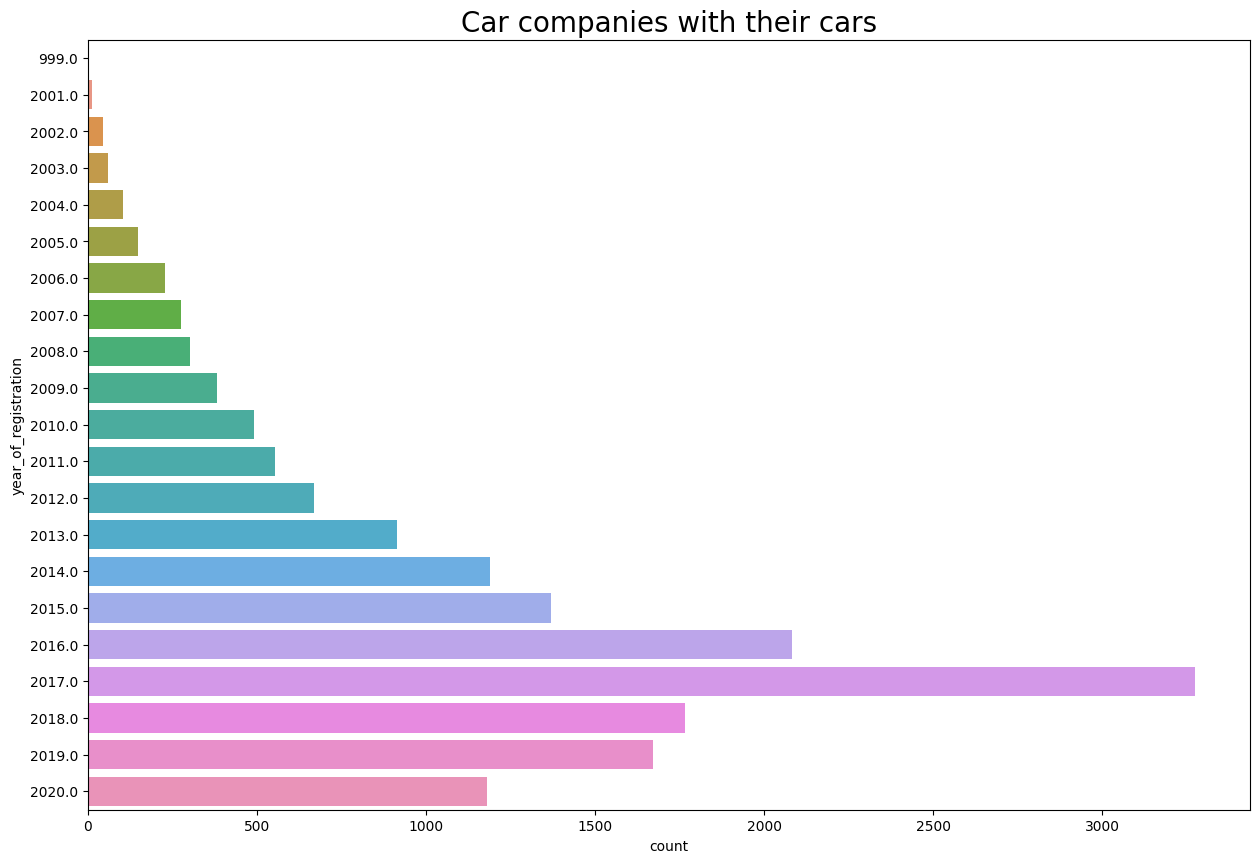

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y = s_df.year_of_registration)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

In [ ]:
s_df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
mileage,0
reg_code,0
standard_colour,0
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,0
price,0
body_type,0
crossover_car_and_van,0


In [ ]:
print("Duplicate Values =",s_df.duplicated().sum())

Duplicate Values = 12


In [ ]:
s_df["standard_make"].unique()

array(['Land Rover', 'Vauxhall', 'Mercedes-Benz', 'Kia', 'Toyota',
       'Jaguar', 'Nissan', 'SKODA', 'Audi', 'Citroen', 'Peugeot', 'Honda',
       'BMW', 'Volkswagen', 'Lexus', 'SEAT', 'Fiat', 'MINI', 'Volvo',
       'Renault', 'Alfa Romeo', 'Suzuki', 'Dacia', 'Hyundai', 'Jeep',
       'Mazda', 'DS AUTOMOBILES', 'Mitsubishi', 'Abarth', 'Subaru',
       'Porsche', 'Smart', 'SsangYong', 'MG', 'Chevrolet', 'Maserati',
       'Chrysler', 'Aston Martin', 'Saab', 'Daihatsu', 'Bentley',
       'Proton', 'Rover', 'Dodge', 'Lotus', 'Infiniti', 'Iveco', 'LEVC',
       'Tesla', 'Cadillac', 'Isuzu', 'Caterham'], dtype=object)

<ipython-input-36-8369e9a95c36>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s_df["price"],color="red",kde=True)


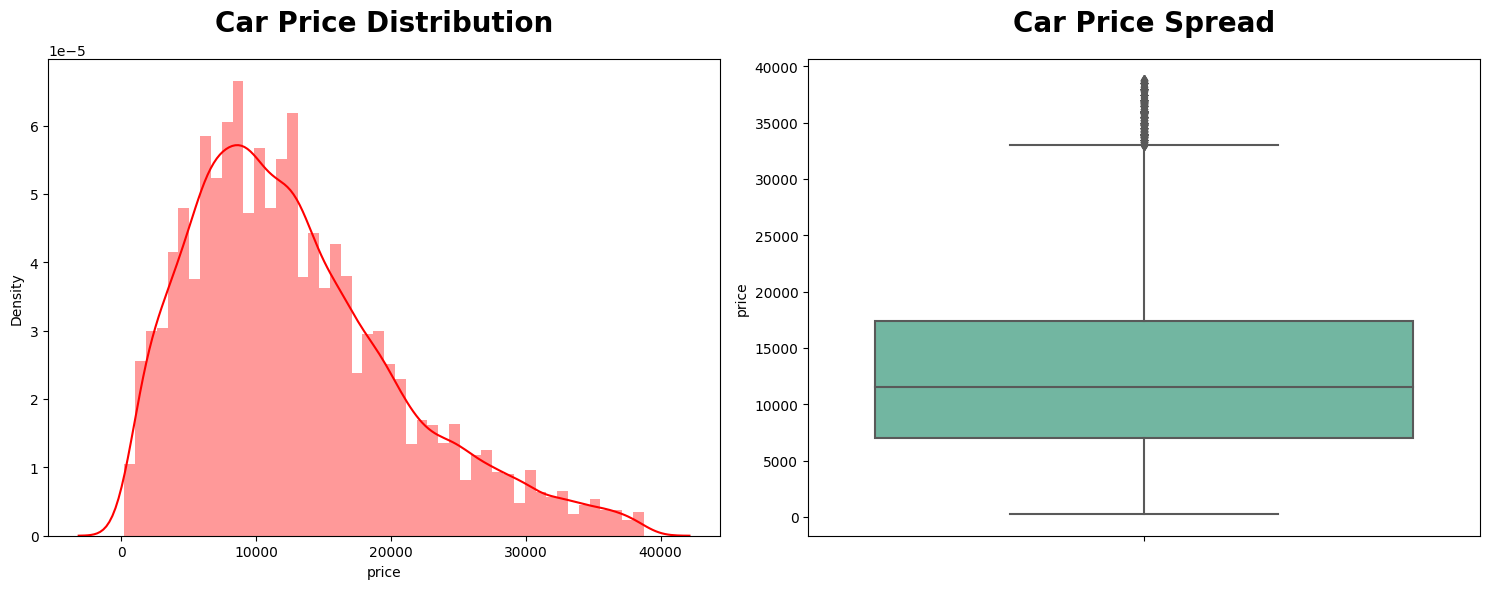

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(s_df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=s_df["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
s_df["price"].agg(["min","mean","median","max","std", "skew"]).to_frame().T

,min,mean,median,max,std,skew
price,250.0,12983.041687,11500.0,38750.0,7896.041339,0.866204


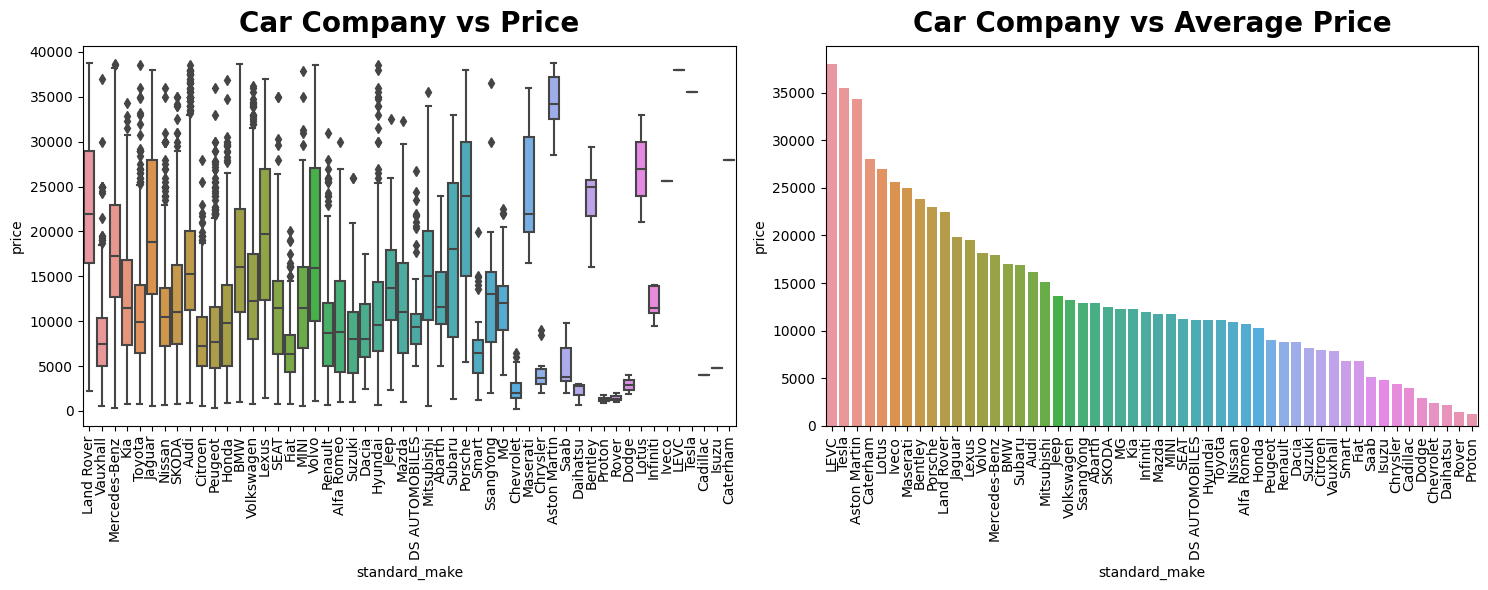

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x="standard_make",y="price",data=s_df)
plt.xticks(rotation=90)
plt.title("Car Company vs Price", pad=10, fontweight="black", fontsize=20)

plt.subplot(1,2,2)
x = pd.DataFrame(s_df.groupby("standard_make")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x)
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black", fontsize=20)
plt.tight_layout()
plt.show()

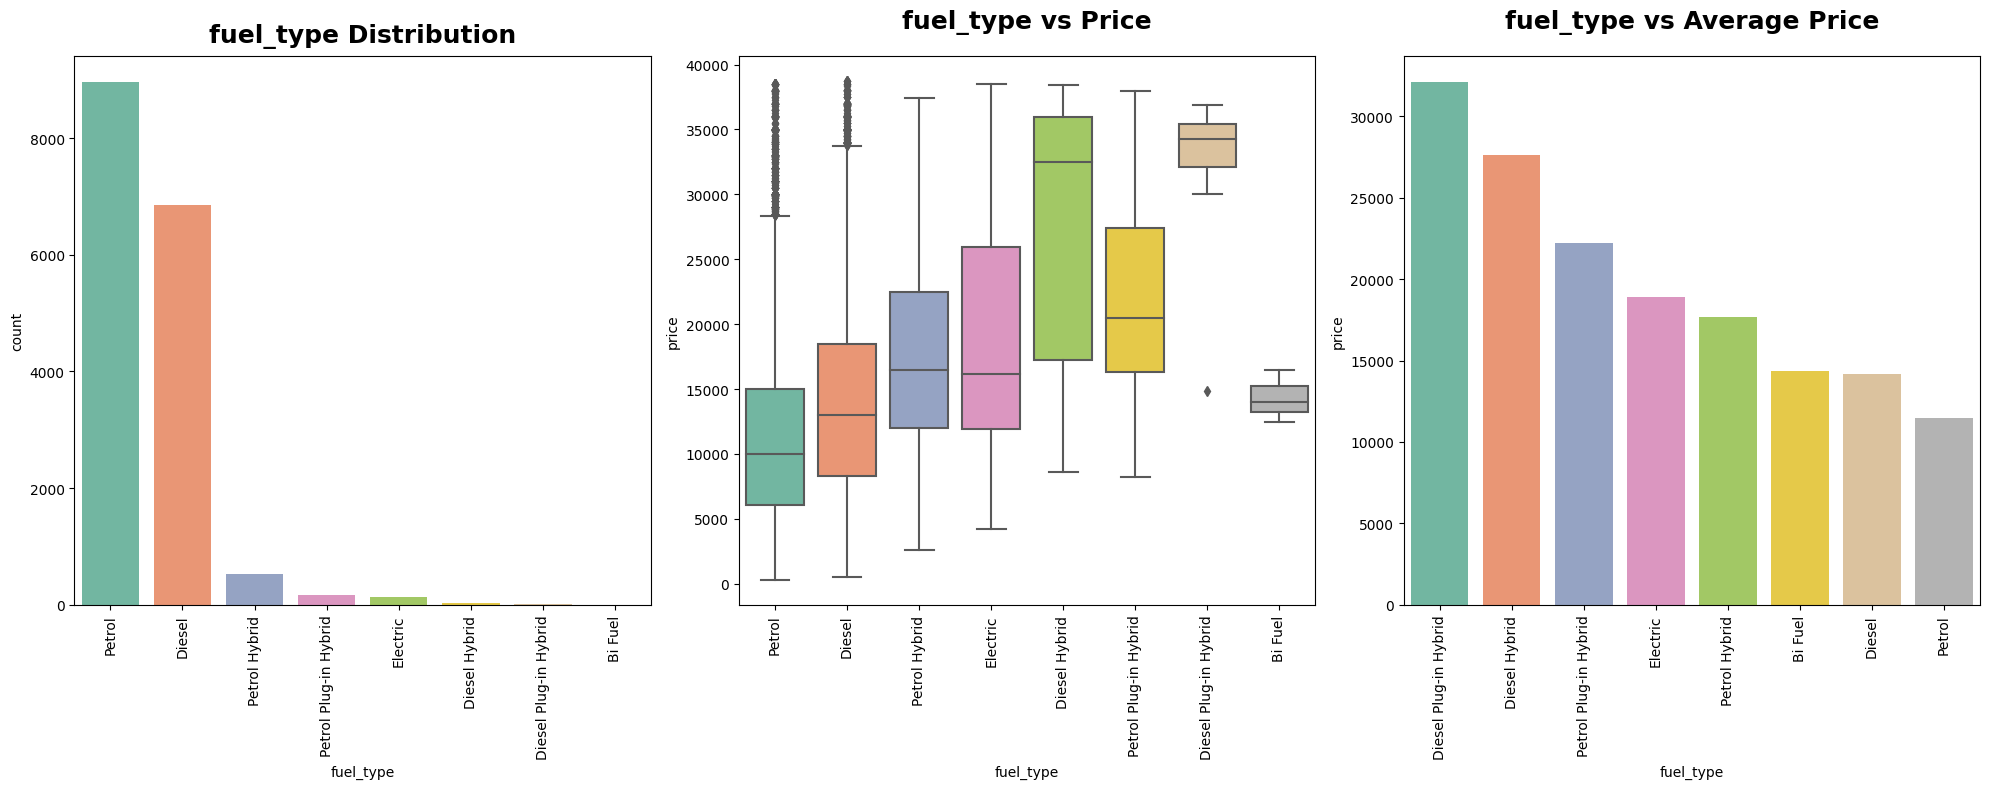

In [ ]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=s_df,palette="Set2",order=s_df[cols].value_counts().index)
    plt.title(f"{cols} Distribution",pad=10,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=s_df,palette="Set2")
    plt.title(f"{cols} vs Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)

    plt.subplot(1,3,3)
    x=pd.DataFrame(s_df.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x,palette="Set2")
    plt.title(f"{cols} vs Average Price",pad=20,fontweight="black",fontsize=18)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

categorical_visualization("fuel_type")

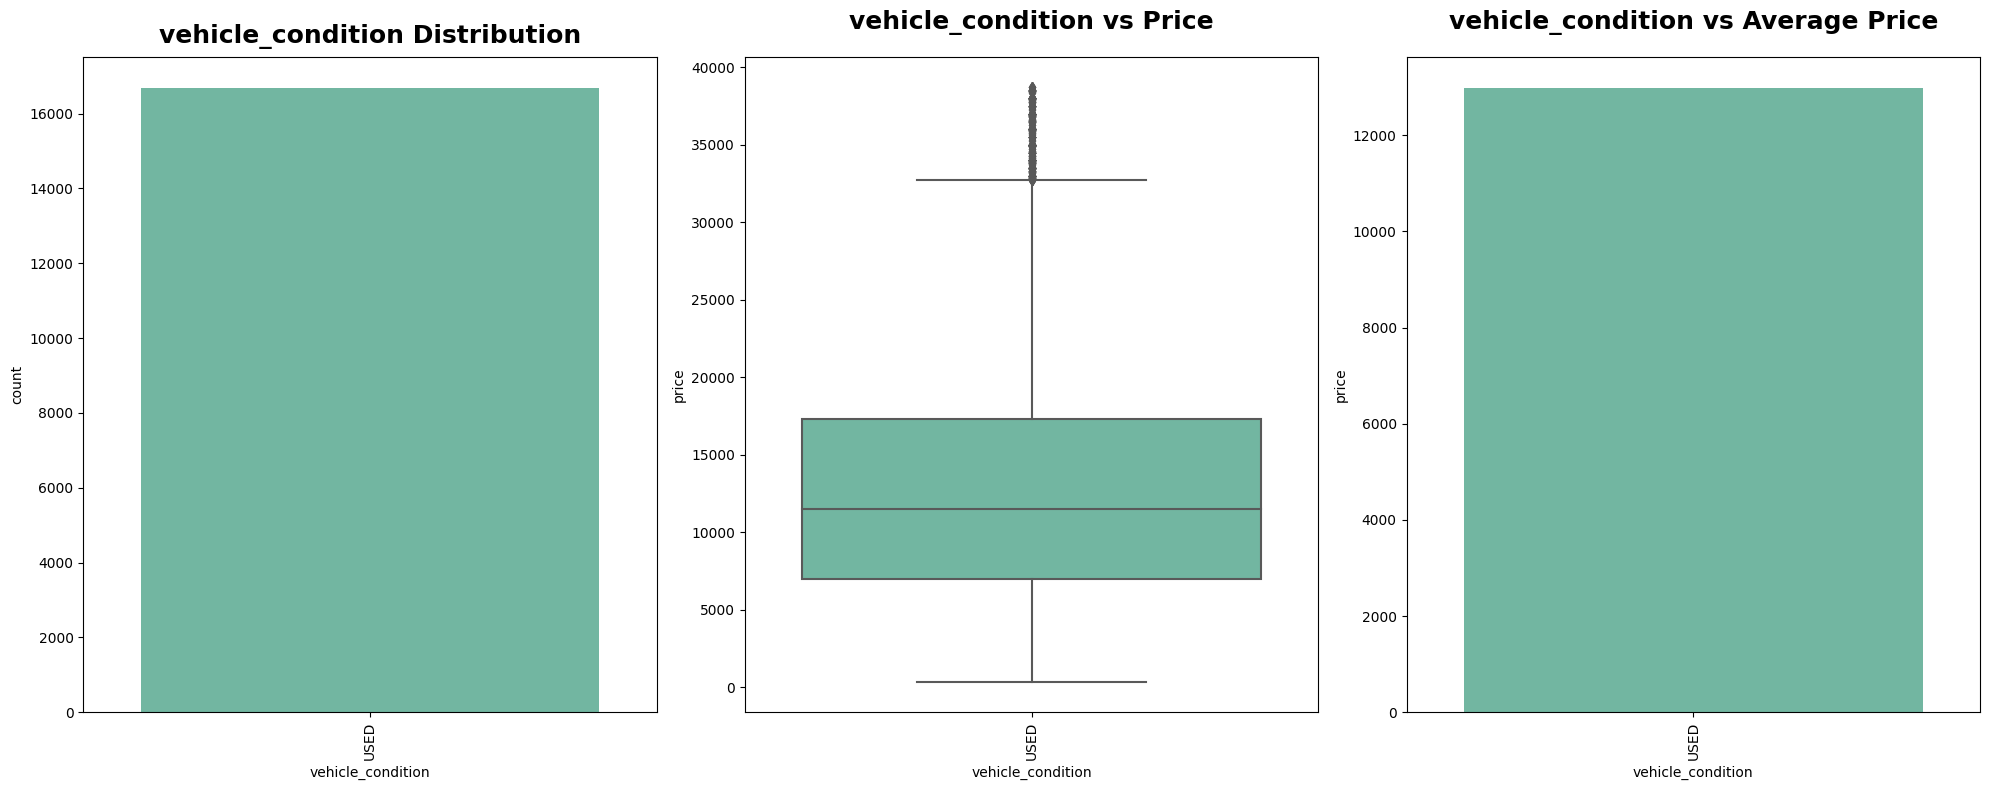

In [ ]:
categorical_visualization("vehicle_condition")

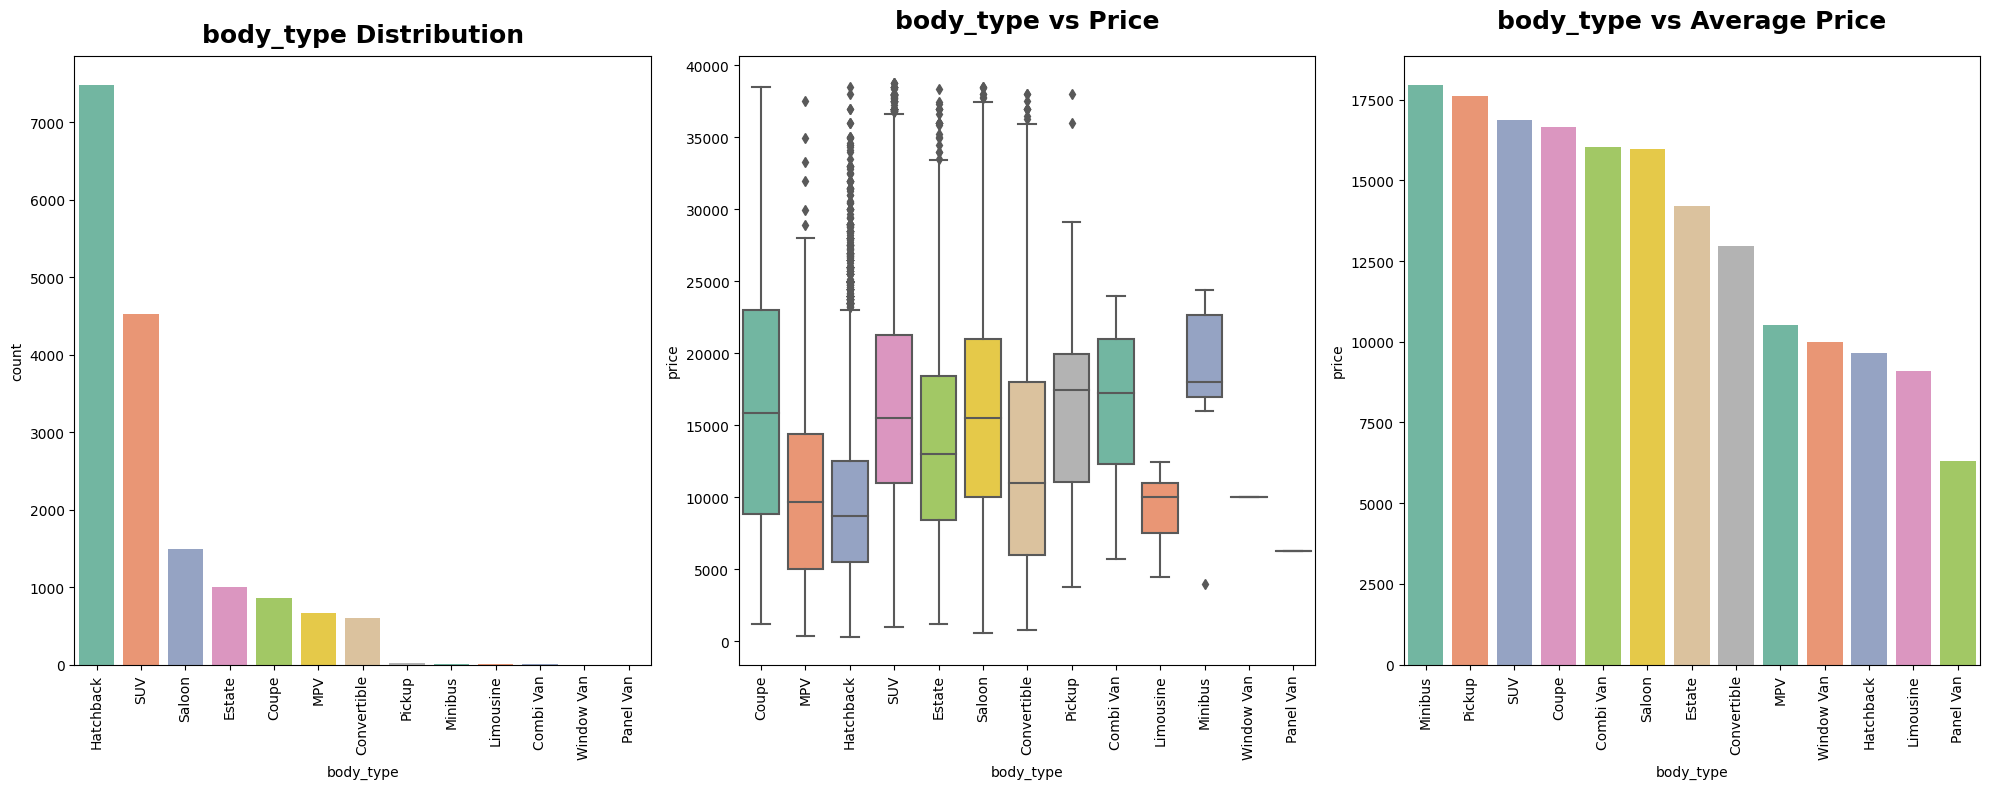

In [ ]:
categorical_visualization("body_type")

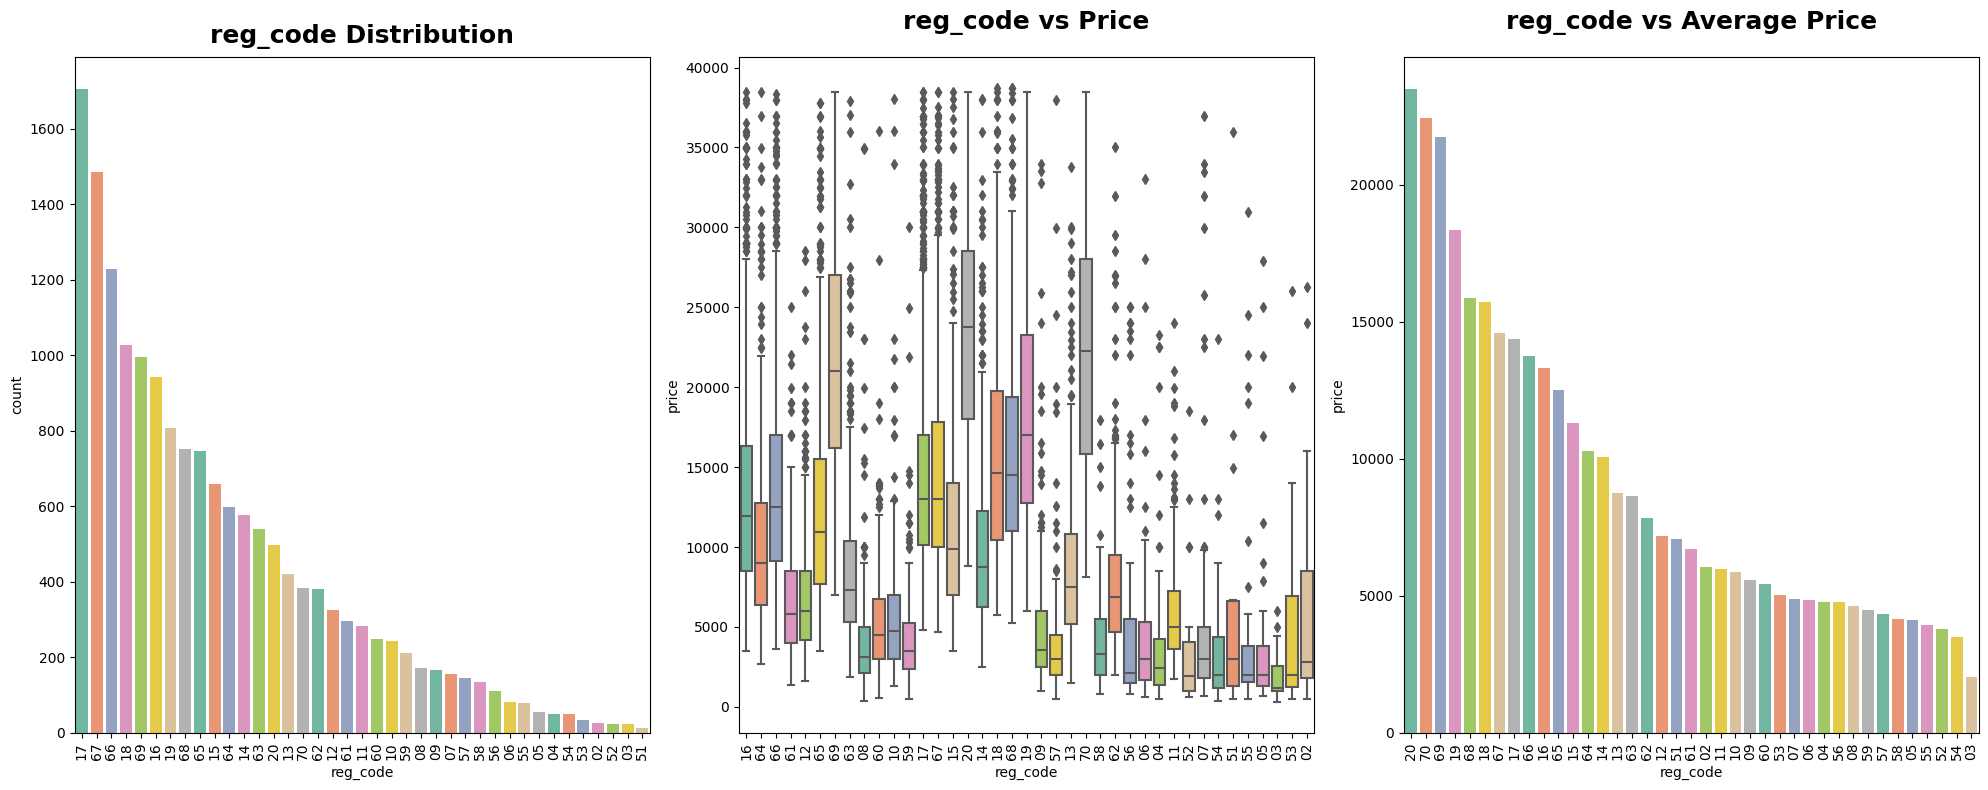

In [ ]:
categorical_visualization("reg_code")


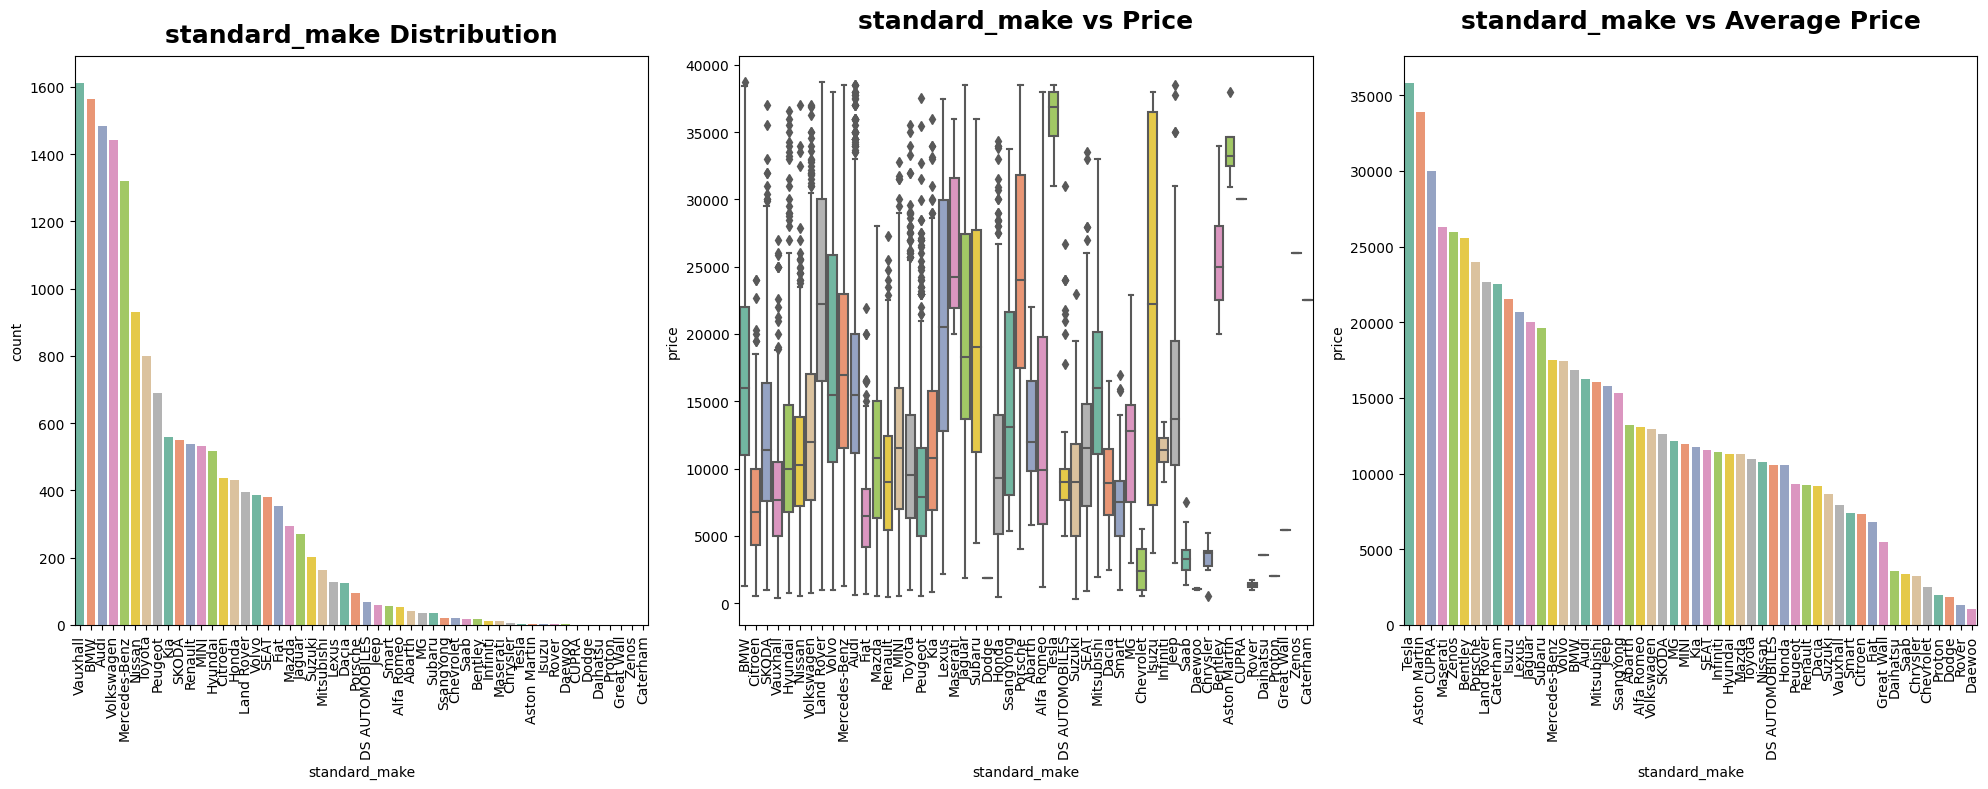

In [ ]:
categorical_visualization("standard_make")

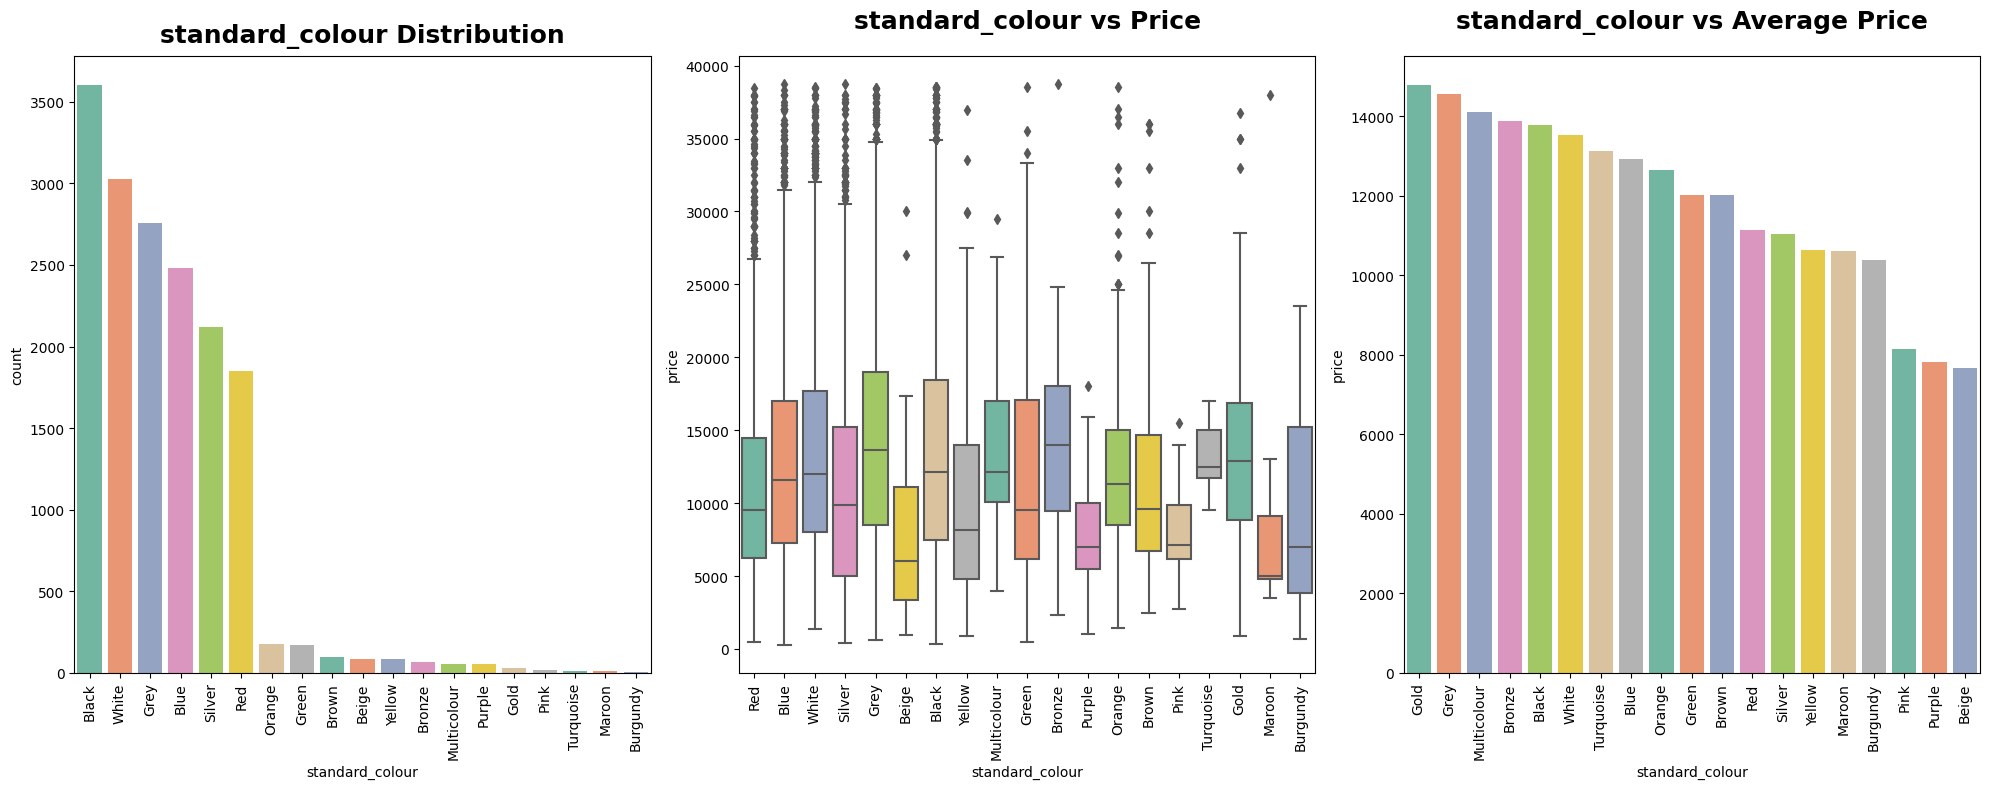

In [ ]:
categorical_visualization("standard_colour")

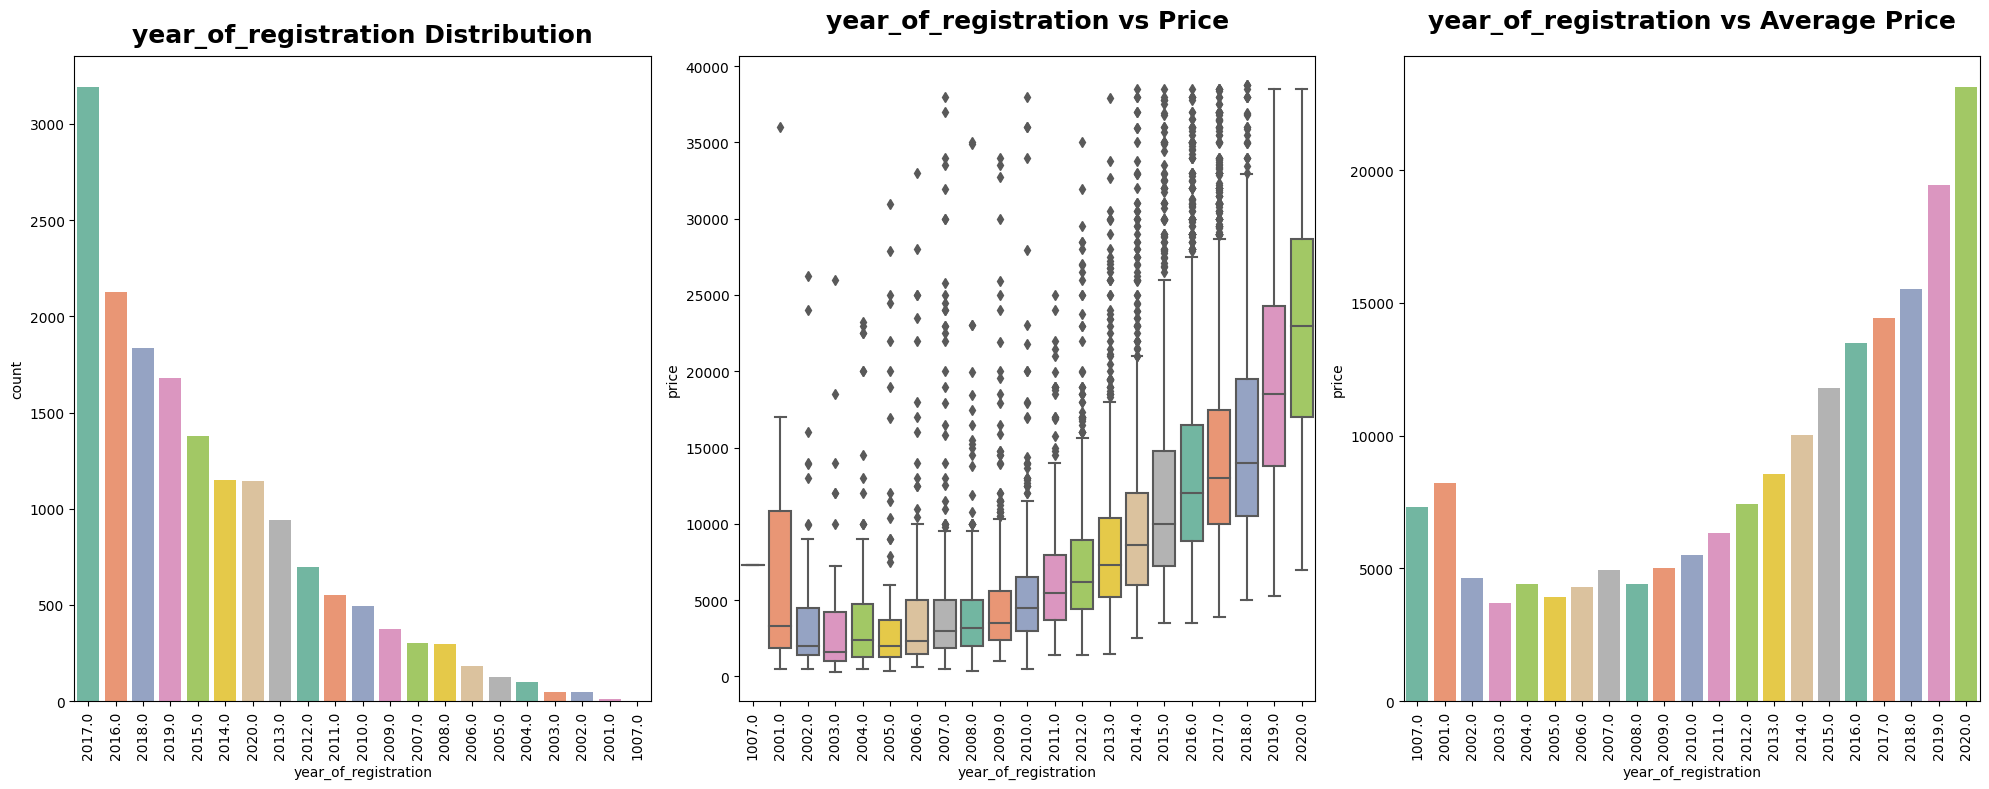

In [ ]:
categorical_visualization("year_of_registration")

In [ ]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16720 entries, 373607 to 266907
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mileage                16720 non-null  float64
 1   reg_code               16720 non-null  object 
 2   standard_colour        16720 non-null  object 
 3   standard_make          16720 non-null  object 
 4   standard_model         16720 non-null  object 
 5   vehicle_condition      16720 non-null  object 
 6   year_of_registration   16720 non-null  float64
 7   price                  16720 non-null  int64  
 8   body_type              16720 non-null  object 
 9   crossover_car_and_van  16720 non-null  bool   
 10  fuel_type              16720 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 1.4+ MB


In [ ]:
z = round(s_df.groupby(["standard_make"])["price"].agg(["mean"]),2).T
z

standard_make,Abarth,Alfa Romeo,Aston Martin,Audi,BMW,Bentley,Cadillac,Caterham,Chevrolet,Chrysler,...,Saab,Smart,SsangYong,Subaru,Suzuki,Tesla,Toyota,Vauxhall,Volkswagen,Volvo
mean,12860.46,10677.0,34376.25,16203.62,16981.29,23844.09,4000.0,28000.0,2369.84,4452.9,...,5165.8,6809.4,12946.32,16908.92,8209.78,35500.0,11083.63,7878.88,13233.44,18162.06


In [ ]:
df = s_df.merge(z.T,how="left",on="standard_make")

In [ ]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['CarsRange'] = pd.cut(df['mean'],bins,right=False,labels=cars_bin)
df.head()

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,mean,CarsRange
0,35759.0,67,White,Land Rover,Range Rover Evoque,USED,2017.0,27750,Coupe,False,Diesel,22422.46,Highend
1,8742.0,67,Grey,Vauxhall,Corsa,USED,2017.0,7892,Hatchback,False,Petrol,7878.88,Budget
2,49000.0,16,Grey,Vauxhall,Insignia,USED,2016.0,7699,Estate,False,Diesel,7878.88,Budget
3,8314.0,67,Black,Mercedes-Benz,GLC Class,USED,2017.0,28500,SUV,False,Diesel,17912.28,Medium
4,46000.0,63,White,Kia,ProCeed,USED,2013.0,8495,Hatchback,False,Petrol,12249.99,Medium


In [ ]:
df_numeric.info()
df_non_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16720 entries, 373607 to 266907
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mileage               16720 non-null  float64
 1   year_of_registration  16720 non-null  float64
 2   price                 16720 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 522.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16720 entries, 373607 to 266907
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   reg_code               16720 non-null  object
 1   standard_colour        16720 non-null  object
 2   standard_make          16720 non-null  object
 3   standard_model         16720 non-null  object
 4   vehicle_condition      16720 non-null  object
 5   body_type              16720 non-null  object
 6   crossover_car_and_van  16720 non-null  bool  
 7   f

In [ ]:
new_df = s_df[['fuel_type', 'vehicle_condition','body_type', 'year_of_registration','standard_colour', 'standard_make', 'price', 'mileage']]

In [ ]:
new_df.head()

,fuel_type,vehicle_condition,body_type,year_of_registration,standard_colour,standard_make,price,mileage
373607,Diesel,USED,Coupe,2017.0,White,Land Rover,27750,35759.0
183915,Petrol,USED,Hatchback,2017.0,Grey,Vauxhall,7892,8742.0
382080,Diesel,USED,Estate,2016.0,Grey,Vauxhall,7699,49000.0
265608,Diesel,USED,SUV,2017.0,Black,Mercedes-Benz,28500,8314.0
144805,Petrol,USED,Hatchback,2013.0,White,Kia,8495,46000.0


In [ ]:
new_df = pd.get_dummies(columns=['fuel_type', 'vehicle_condition','body_type','standard_colour', 'standard_make'], data=new_df)

In [ ]:
new_df.head()

,year_of_registration,price,mileage,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Petrol,fuel_type_Petrol Hybrid,...,standard_make_Saab,standard_make_Smart,standard_make_SsangYong,standard_make_Subaru,standard_make_Suzuki,standard_make_Tesla,standard_make_Toyota,standard_make_Vauxhall,standard_make_Volkswagen,standard_make_Volvo
373607,2017.0,27750,35759.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183915,2017.0,7892,8742.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
382080,2016.0,7699,49000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
265608,2017.0,28500,8314.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144805,2013.0,8495,46000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
scaler = StandardScaler()

In [ ]:
num_cols = ['year_of_registration','price', 'mileage']
new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [ ]:
new_df.head()

,year_of_registration,price,mileage,fuel_type_Bi Fuel,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Diesel Plug-in Hybrid,fuel_type_Electric,fuel_type_Petrol,fuel_type_Petrol Hybrid,...,standard_make_Saab,standard_make_Smart,standard_make_SsangYong,standard_make_Subaru,standard_make_Suzuki,standard_make_Tesla,standard_make_Toyota,standard_make_Vauxhall,standard_make_Volkswagen,standard_make_Volvo
373607,0.209369,1.870228,-0.128487,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183915,0.209369,-0.644778,-1.022848,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
382080,0.094258,-0.669221,0.309838,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
265608,0.209369,1.965215,-1.037016,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144805,-0.251076,-0.568408,0.210527,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


##Model Building

In [ ]:
x = new_df.drop(columns=["price"])
y = new_df["price"]

In [ ]:
x.shape

(16720, 94)

In [ ]:
y.shape

(16720,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (13376, 94)
x_test - >   (3344, 94)
y_train - >   (13376,)
y_test - >   (3344,)


In [ ]:
training_score = []
testing_score = []

In [ ]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)


    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)


In [ ]:
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 70.69431278848346
r2_Score of LinearRegression() model on Testing Data is: 69.73452034310424


In [ ]:
model_prediction(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 80.15149273625785
r2_Score of GradientBoostingRegressor() model on Testing Data is: 78.12437168167732


In [ ]:
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 97.35624742683449
r2_Score of RandomForestRegressor() model on Testing Data is: 78.15794562518089


In [ ]:
models = [LinearRegression,GradientBoostingRegressor, RandomForestRegressor]

##An Averager/Voter/Stacker Ensemble






In [ ]:
av_models = [LinearRegression, GradientBoostingRegressor, RandomForestRegressor]
# For each model train and pred
predictions = []
for model_class in av_models:
    model_instance = model_class()  # instantiate the model
    model_instance.fit(x_train, y_train)  # train the model
    y_pred = model_instance.predict(x_test)
    predictions.append(y_pred)

# Average
average_predictions = np.mean(predictions, axis=0)
# RMSE
rmse = np.sqrt(mean_squared_error(y_test, average_predictions))
print("Ensemble RMSE: {:.2f}".format(rmse))

Ensemble RMSE: 0.44


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor

gb_model = GradientBoostingRegressor().fit(x_train, y_train)
lr_model = LinearRegression().fit(x_train, y_train)

# Majority Vote
vote_predictions = np.mean(predictions, axis=0)
rmse = np.sqrt(mean_squared_error(y_test, vote_predictions))
print("Majority Vote RMSE: {:.2f}".format(rmse))

# Stacked Ensemble
stacked_dataset = np.column_stack(predictions)
meta_model = LinearRegression()
# NOTE: Ideally you would train the meta model on a different dataset or using CV predictions
meta_model.fit(stacked_dataset, y_test)
stacked_predictions = meta_model.predict(stacked_dataset)
rmse = np.sqrt(mean_squared_error(y_test, stacked_predictions))
print("Stacked Model RMSE: {:.2f}".format(rmse))

# Voting Regressor
estimators = [('gb', gb_model), ('lr', lr_model)]
ensemble_model = VotingRegressor(estimators)
ensemble_model.fit(x_train, y_train)
ensemble_predictions = ensemble_model.predict(x_test)
rmse_ensemble = np.sqrt(mean_squared_error(y_test, ensemble_predictions))
print("Voting Regressor RMSE: {:.2f}".format(rmse_ensemble))

Majority Vote RMSE: 0.44
Stacked Model RMSE: 0.44
Voting Regressor RMSE: 0.47


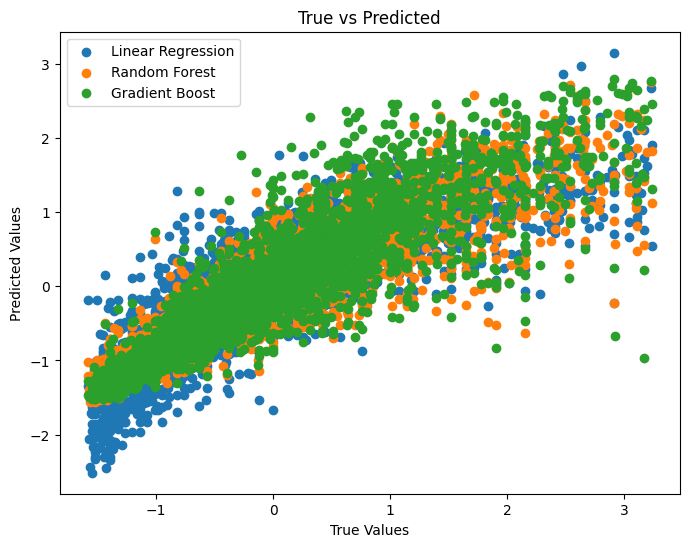

In [ ]:
plt.figure(figsize=(8,6))
models_labels = ["Linear Regression", "Random Forest", "Gradient Boost"]
predictions_list = predictions + [average_predictions, stacked_predictions]

# Take the minimum length between the two lists
min_length = min(len(models_labels), len(predictions_list))

for i in range(min_length):
    plt.scatter(y_test, predictions_list[i], label=models_labels[i])

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.legend()
plt.show()


In [ ]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

In [ ]:
df.head()

,Algorithms,Training Score,Testing Score
0,<class 'sklearn.linear_model._base.LinearRegre...,70.694313,69.734520
1,<class 'sklearn.ensemble._gb.GradientBoostingR...,80.151493,78.124372
2,<class 'sklearn.ensemble._forest.RandomForestR...,97.356247,78.157946


<ipython-input-87-3c8019581541>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


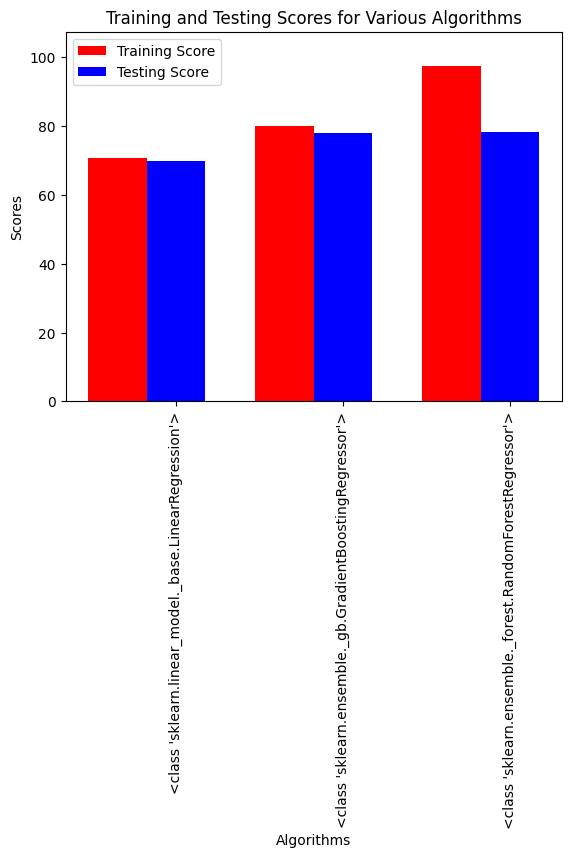

In [ ]:
# Set up bar positions
bar_width = 0.35
index = range(len(df['Algorithms']))

# Create bars for Training Score
plt.bar(index, df['Training Score'], bar_width, label='Training Score', color='r')

# Create bars for Testing Score (shifted by bar_width to place beside the Training Score bars)
plt.bar([i+bar_width for i in index], df['Testing Score'], bar_width, label='Testing Score', color='b')

# Set up the graph
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Training and Testing Scores for Various Algorithms')
plt.xticks([i + bar_width for i in index], df['Algorithms'], rotation=90)
plt.legend()
plt.tight_layout()

plt.ylim(0, max(max(df['Training Score']), max(df['Testing Score'])) + 10)

# Display the graph
plt.show()


In [ ]:
!pip install shap
import shap

In [ ]:
models = {
    "Linear Regression": LinearRegression().fit(x, y),
    "Random Forest": RandomForestRegressor().fit(x, y),
    "Gradient Boost": GradientBoostingRegressor().fit(x, y),

}

for name, model in models.items():
    if name == "Linear Regression":
        explainer = shap.KernelExplainer(model.predict, shap.sample(x, 100))
        shap_values = explainer.shap_values(x, nsamples=100)
    else:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(x)

    print(f"SHAP Summary for {name}")

    # Set the figure size
    plt.figure(figsize=(20, 10))
    shap.summary_plot(shap_values, x, plot_type="bar")

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(s_df.drop('price', axis=1), s_df['price'], test_size=0.25)

# Train a random forest model
clf = RandomForestRegressor()
clf.fit(x_train, y_train)

# Create a PartialDependenceDisplay object
pdp = PartialDependenceDisplay.from_estimator(clf, x_train, ['mileage', 'year_of_registration'])

# Plot the PartialDependenceDisplay object
pdp.plot()

ValueError: ignored

In [ ]:
import shap
from shap import ShapExplainer

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.25)

# Train a random forest model
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

# Create a ShapExplainer object
explainer = ShapExplainer(clf)

# Calculate the SHAP values for each feature for a given instance
shap_values = explainer.shap_values(X_test[0:1])

# Plot the SHAP values using a bar chart
plt.bar(X_test.columns, shap_values[0])
plt.xlabel('Feature')
plt.ylabel('SHAP Value')
plt.title('SHAP Values for Instance 0')
plt.show()

In [ ]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

y_pred = model.predict(x_test)

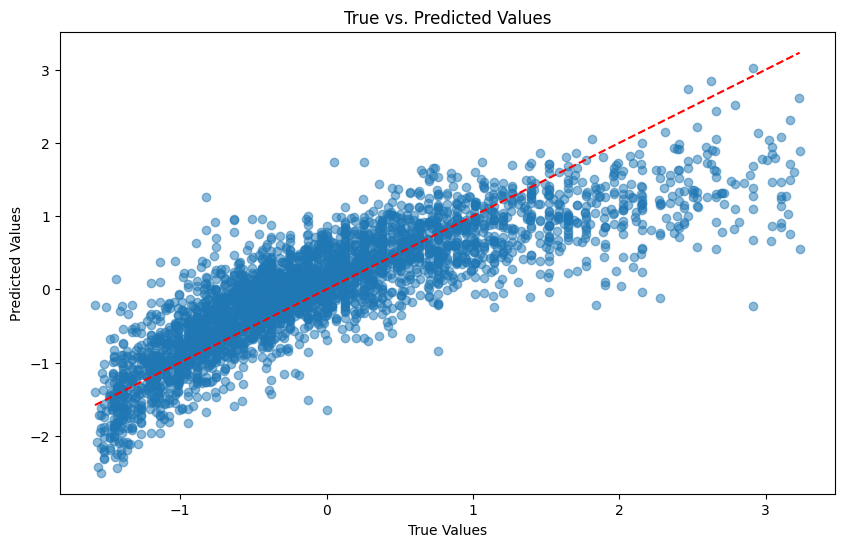

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')

# Plotting the line of perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()


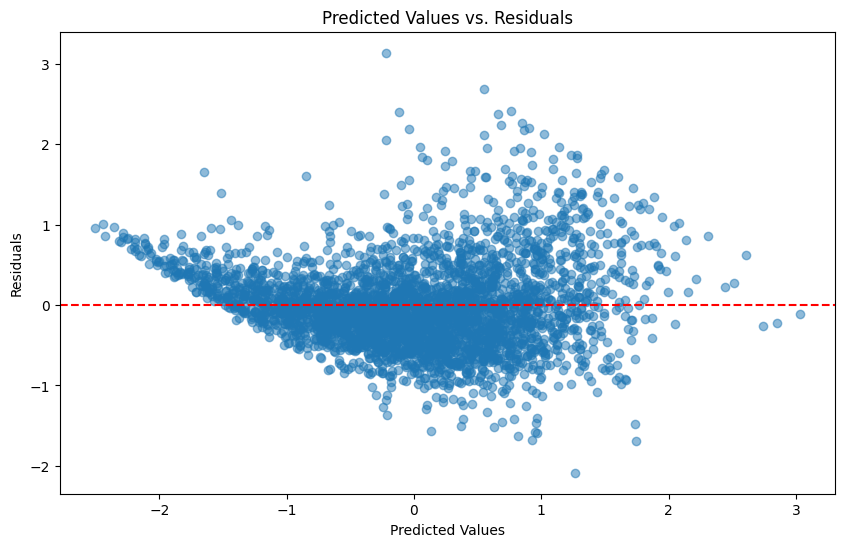

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs. Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
